In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings;
warnings.filterwarnings("ignore")

RMS Titanic'in 15 Nisan 1912 sabahı erken saatlerde, geminin Southampton'dan New York'a yaptığı ilk seferinden dört gün sonra batması, 1.500'den fazla insanın ölümüne neden olarak tarihteki en ölümcül barış zamanı deniz felaketlerinden biri oldu. O dönemde hizmet veren en büyük yolcu gemisi olan Titanic, Kuzey Atlantik'te bir buzdağına çarptığında gemide tahminen 2.224 kişi bulunuyordu. Gemi altı kez deniz buzu uyarısı almıştı ancak gözcüler buzdağını gördüklerinde neredeyse maksimum hızda seyrediyordu. Yeterince hızlı dönemeyen gemi, sancak (sağ) tarafını büken ve on altı bölmeden beşini denize açan bir darbe aldı. Felaket, cankurtaran botlarının eksikliği, gevşek düzenlemeler ve tahliye sırasında üç yolcu sınıfına eşit davranılmaması nedeniyle yaygın bir öfkeye neden oldu. Soruşturmalar denizcilik yönetmeliklerinde kapsamlı değişiklikler yapılmasını önerdi ve bu da deniz güvenliğini yönetmeye devam eden Uluslararası Denizde Can Güvenliği Sözleşmesi'ne (1914) yol açtı.

# Variable Description

PassengerId: unique id number to each passenger

Survived: passenger survive(1) or died(0)

Pclass: passenger class

Name: name

Sex: gender of passenger

Age: age of passenger

SibSp: number of siblings/spouses

Parch: number of parents/children

Ticket: ticket number

Fare: amount of money spent on ticket

Cabin: cabin category

Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.select_dtypes("object")

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [86]:
df.select_dtypes("number")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [51]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
df.Embarked.value_counts(dropna = False) # içerisindeki nan değerlerde gözüktü

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [60]:
df.groupby(["Sex", "Embarked"])["Survived"].value_counts()

Sex     Embarked  Survived
female  C         1            64
                  0             9
        Q         1            27
                  0             9
        S         1           140
                  0            63
male    C         0            66
                  1            29
        Q         0            38
                  1             3
        S         0           364
                  1            77
Name: Survived, dtype: int64

In [63]:
df.groupby(["Sex", "Embarked"], dropna = False)["Survived"].value_counts()
# dropna nın nerede olduğuna dikkat edin

Sex     Embarked  Survived
female  C         1            64
                  0             9
        Q         1            27
                  0             9
        S         1           140
                  0            63
        NaN       1             2
male    C         0            66
                  1            29
        Q         0            38
                  1             3
        S         0           364
                  1            77
Name: Survived, dtype: int64

# df has 891 entries, some values for Cabin and Age are missing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [69]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


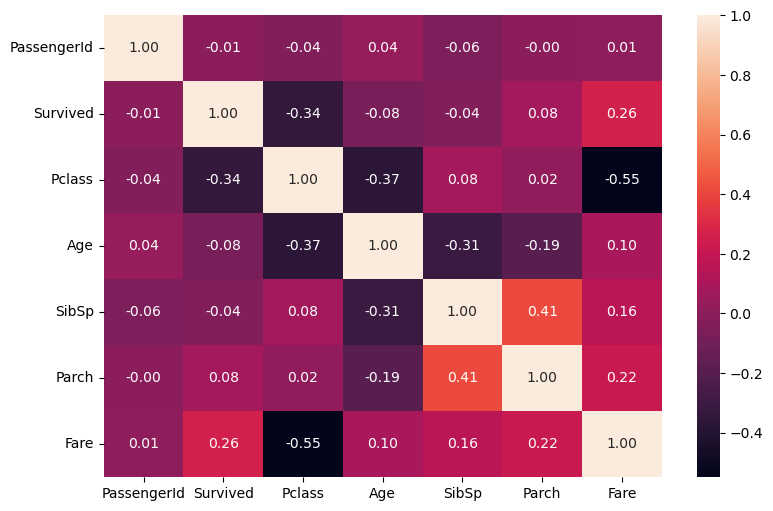

In [70]:
plt.subplots(figsize=(9,6))  # tek bir tablo olduğu için f, ax = diye başlamadım

sns.heatmap(df.corr(), annot = True, fmt = ".2f");

# Of all passengers in df, how many survived, how many died ?

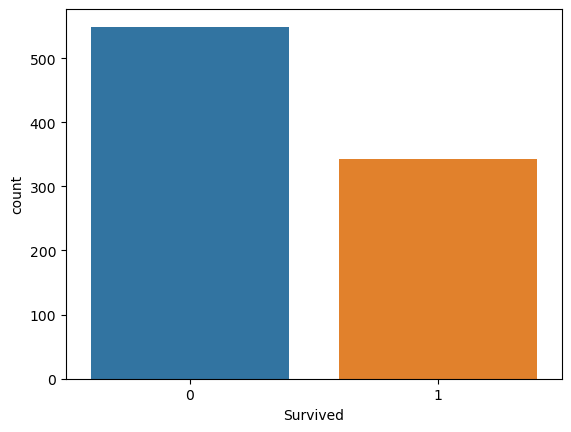

In [88]:
sns.countplot(x = df.Survived);

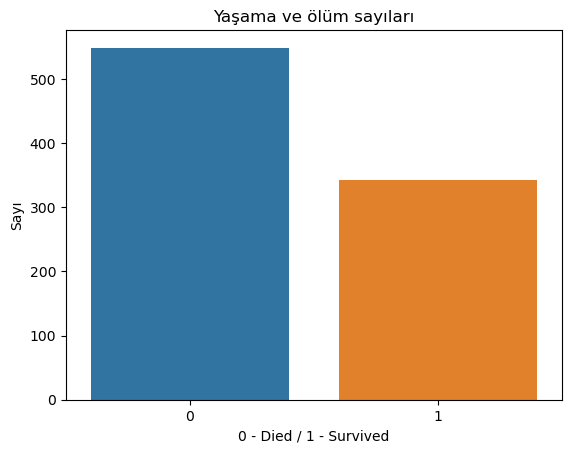

In [5]:
sns.countplot(x = 'Survived', data=df) # grafik çizimi

# tablo şekliyle alakalı ayarlamalar yaptık
plt.xlabel("0 - Died / 1 - Survived")
plt.ylabel("Sayı")
plt.title("Yaşama ve ölüm sayıları");

In [6]:
df[df["Survived"] == 1]["Survived"].count() / df["Survived"].count()

0.3838383838383838

In [7]:
df.Survived.sum() / df.Survived.count() 
# sütun değerleri 0 ve 1 den oluştuğu için hayatta kalanları hesaplamak için b

0.3838383838383838

# Cinsiyetlere göre ölüm ve yaşama durumlarını inceleyelim

In [8]:
df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

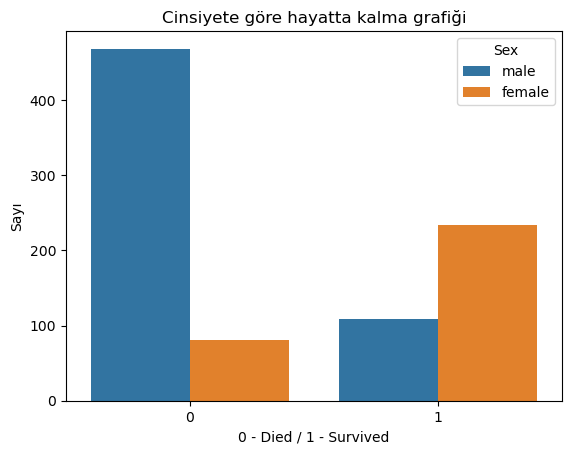

In [9]:
sns.countplot(x = 'Survived', data=df, hue = "Sex") # grafik çizimi

# tablo şekliyle alakalı ayarlamalar yaptık
plt.xlabel("0 - Died / 1 - Survived")
plt.ylabel("Sayı")
plt.title("Cinsiyete göre hayatta kalma grafiği");

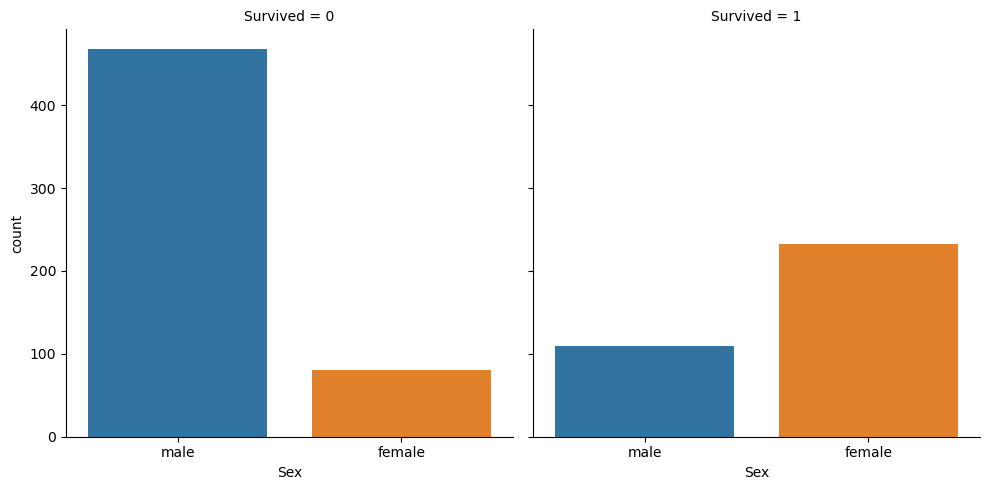

In [10]:
sns.catplot(data = df, x = "Sex", col = "Survived", kind = "count")

In [11]:
df.groupby(["Survived", "Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [12]:
print(f"Kadınların hayatta kalma oranı: {round(df[df.Sex == 'female'].Survived.sum() / df[df.Sex == 'female'].Survived.count(), 2)}")
print(f"Erkeklerin hayatta kalma oranı: {round(df[df.Sex == 'male'].Survived.sum() / df[df.Sex == 'male'].Survived.count(), 2)}")
# f-string kullandığımız için süslü parantez içerisinde çift tırnak kullanmamalıyız

Kadınların hayatta kalma oranı: 0.74
Erkeklerin hayatta kalma oranı: 0.19


In [101]:
df[["Sex", "Survived"]].groupby("Sex").mean().sort_values(by = "Survived")

,Survived
Sex,
male,0.188908
female,0.742038


In [ ]:
df.sort_values()

Bu kod, matplotlib kütüphanesini kullanarak 1 satır ve 2 sütuna sahip bir grafik oluşturur.
Bu grafikte iki adet ayrı alt grafik yer alır. 
figsize argümanı ise oluşturulan grafiğin boyutlarını belirler. 
(16,7) değerleri, genişliği 16 inç ve yüksekliği 7 inç olan bir grafik oluşturulmasını sağlar.

plt.subplots fonksiyonu iki değer döndürür: fig, ax olarak adlandırılan iki değişken. 
fig değişkeni, grafiğin genel özelliklerini kontrol etmek için kullanılabilirken, 
ax değişkeni, her bir alt grafiği kontrol etmek için kullanılabilir. 
Bu nedenle ax değişkeni bir dizi olarak döndürülür, çünkü burada 1 satır ve 2 sütunlu 2 adet alt grafik oluşturuluyor.

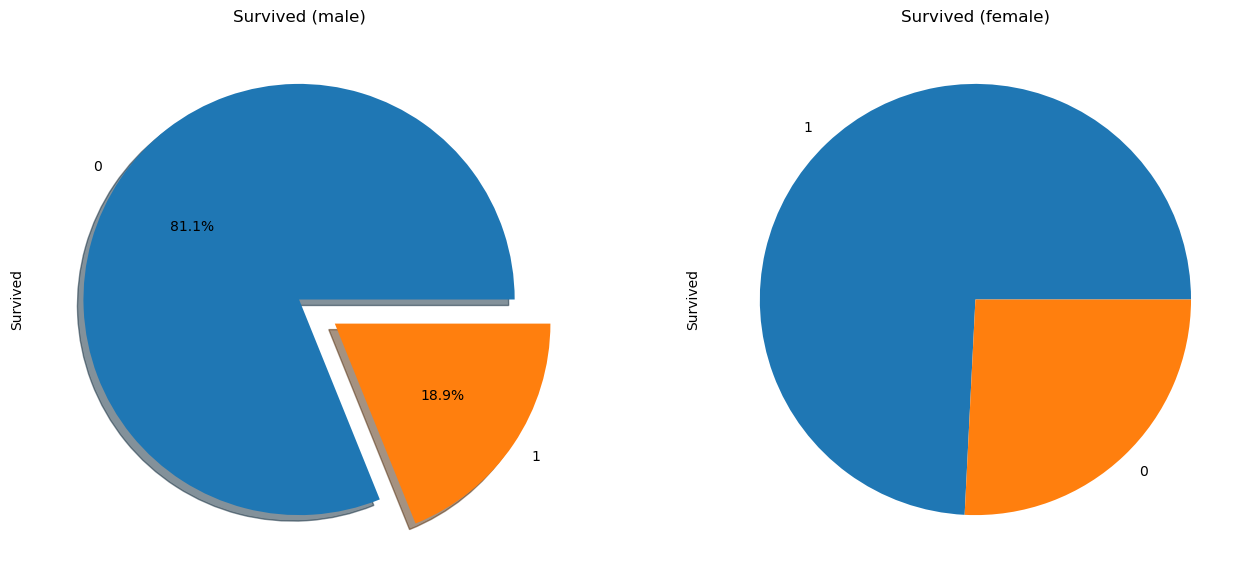

In [13]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex'] == 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True )
# plot.pie() fonksiyonu bu sayıları kullanarak bir pasta grafiği oluşturur. 
# explode argümanı, pasta grafiğindeki her bir dilim arasındaki boşluğu ayarlar. 
# autopct argümanı, her bir dilimin yüzdesini pasta dilimlerinin üzerinde gösterir.
# ax=ax[0] argümanı, pasta grafiğini ilk alt grafiğe (ax[0]) yerleştirir. 
# shadow=True argümanı, pasta grafiği dilimlerinin gölgelendirilmesini sağlar.
df['Survived'][df['Sex'] == 'female'].value_counts().plot.pie() # pie() içini doldurunuz !!

# başlıklarını ekledik
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)');

# Insight 1 : Kadınların hayatta kalma olasılığı erkeklere göre daha yüksekti

# Sınıflara göre inceleme

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
df.groupby(["Pclass", "Survived"])["Pclass"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [17]:
print("Pclass = 1 yaşama oranı: ", df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count())
print("Pclass = 2 yaşama oranı: ", df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count())
print("Pclass = 3 yaşama oranı: ", df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count())

Pclass = 1 yaşama oranı:  0.6296296296296297
Pclass = 2 yaşama oranı:  0.47282608695652173
Pclass = 3 yaşama oranı:  0.24236252545824846


In [96]:
df[["Pclass","Survived"]].groupby(["Pclass"]).mean().sort_values(by="Survived",ascending = False)
# değerler 0 ve 1 den oluştuğu için ortalamasını alarak oranları bulabildik

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# Insight 2 : en yüksek ölüm oranı 3. classta gerçekleşmiş

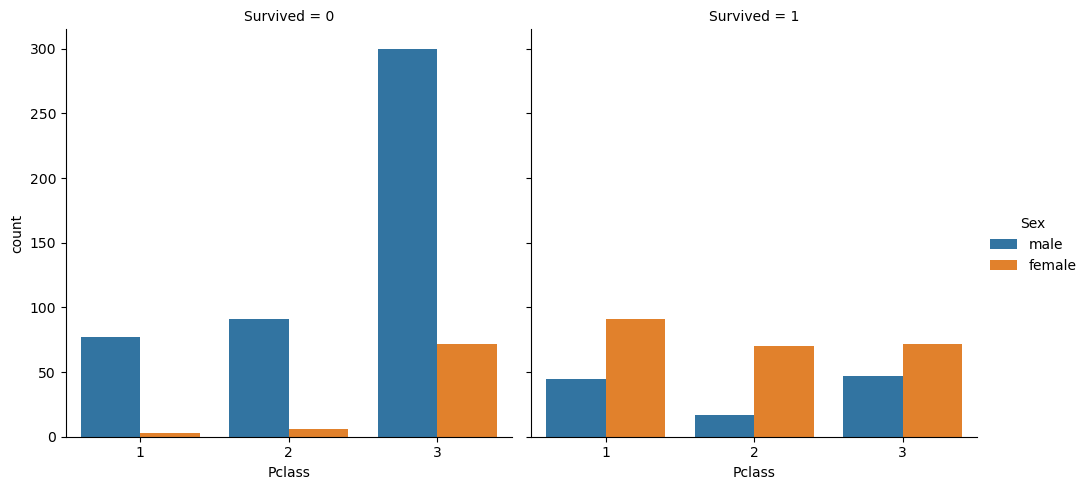

In [18]:
sns.catplot(data = df, x = "Pclass", col = "Survived", hue = "Sex", kind = "count")

# Embarked için inceleme yapalım

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df.groupby(["Embarked", "Survived"])["Embarked"].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Embarked, dtype: int64

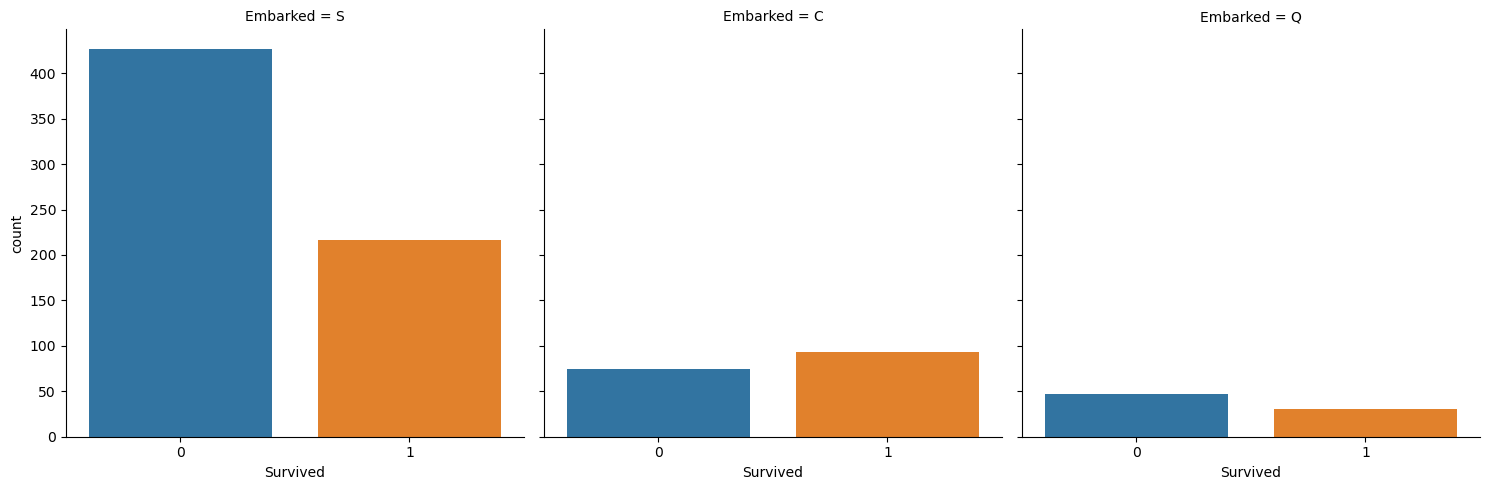

In [22]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df);

# general insights

Gemiye Binme, Sınıf ve Cinsiyet :

1) C ve Q'da gemiye binen Pclass 2'den neredeyse tüm kadınlar hayatta kalmıştır, 
2) ayrıca Pclass 1'den neredeyse tüm kadınlar hayatta kalmıştır.

3) Q'da gemiye binen Pclass 1 ve 2'deki tüm erkekler ölmüştür,
4) Pclass 2 ve 3'teki erkekler için hayatta kalma oranı her zaman 0,2'nin altındadır.

5) S ve Q gemilerine binen Pclass 1'deki kalan erkekler için hayatta kalma oranı yaklaşık 0,4'tür.

In [23]:
#1'in kanıtı
print(df[df.Embarked.isin(["C", "Q"]) & (df.Sex == "female") & (df.Pclass == 2)]["Survived"].value_counts())
df[df.Embarked.isin(["C", "Q"]) & (df.Sex == "female") & (df.Pclass == 2)]["Survived"].value_counts(normalize = True) * 100

1    9
Name: Survived, dtype: int64


1    100.0
Name: Survived, dtype: float64

In [24]:
#2'nin kanıtı
print(df[df.Embarked.isin(["C", "Q"]) & (df.Sex == "female") & (df.Pclass == 1)]["Survived"].value_counts())
df[df.Embarked.isin(["C", "Q"]) & (df.Sex == "female") & (df.Pclass == 1)]["Survived"].value_counts(normalize = True) * 100

1    43
0     1
Name: Survived, dtype: int64


1    97.727273
0     2.272727
Name: Survived, dtype: float64

In [25]:
# 3' ün kanıtı
print(df[(df.Embarked == "Q") & (df.Sex == "male") & (df.Pclass.isin([1, 2]))]["Survived"].value_counts())
df[(df.Embarked == "Q") & (df.Sex == "male") & (df.Pclass.isin([1, 2]))]["Survived"].value_counts(normalize = True) * 100

0    2
Name: Survived, dtype: int64


0    100.0
Name: Survived, dtype: float64

In [26]:
# 4
df[(df.Sex == "male") & (df.Pclass.isin([2, 3]))]["Survived"].value_counts(normalize = True) * 100

0    85.934066
1    14.065934
Name: Survived, dtype: float64

In [27]:
# 5) S ve Q gemilerine binen Pclass 1'deki kalan erkekler için hayatta kalma oranı yaklaşık 0,4'tür.
print(df[(df.Embarked.isin(["Q", "S"])) & (df.Sex == "male") & (df.Pclass == 1)]["Survived"].value_counts())
df[(df.Embarked.isin(["Q", "S"])) & (df.Sex == "male") & (df.Pclass == 1)]["Survived"].value_counts(normalize = True) * 100

0    52
1    28
Name: Survived, dtype: int64


0    65.0
1    35.0
Name: Survived, dtype: float64

# Bölüm 2: Veri düzenleme
iki yeni veri çerçevesi oluşturma df_train_ml ve df_test_ml

Bunlar yalnızca sıralı özelliklere sahip olacak ve ML algoritmaları için kullanılabilmeleri için eksik değer içermeyecektir

pd.get_dummies ile kategorik değerlerin sayısal değerlere dönüştürülmesi

Tahmin için yararlı olmadığı düşünülen tüm özelliklerin çıkarılması

In [44]:
df_train_ml = df.copy()
df_train_ml.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df_train_ml = pd.get_dummies(df_train_ml, columns = ['Sex', 'Embarked', 'Pclass'], drop_first=True)
# drop_first = True yaparak ilk değerleri tabloya dahil etmedik. zaten diğerlerine göre yorumlayabiliriz
df_train_ml

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,0


In [46]:
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1, inplace=True)
df_train_ml

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
888,0,NaN,1,2,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [ ]:
# df_train_ml.dropna(inplace = True)
# satırda bir tane bile nan varsa o satrı düşürür

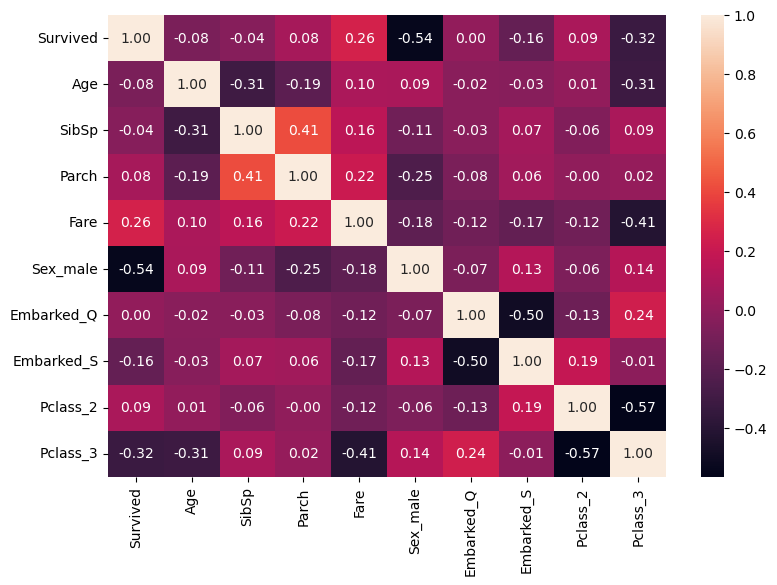

In [68]:
plt.subplots(figsize=(9,6))  # tek bir tablo olduğu için f, ax = diye başlamadım

sns.heatmap(df_train_ml.corr(), annot = True, fmt = ".2f");


# IQR

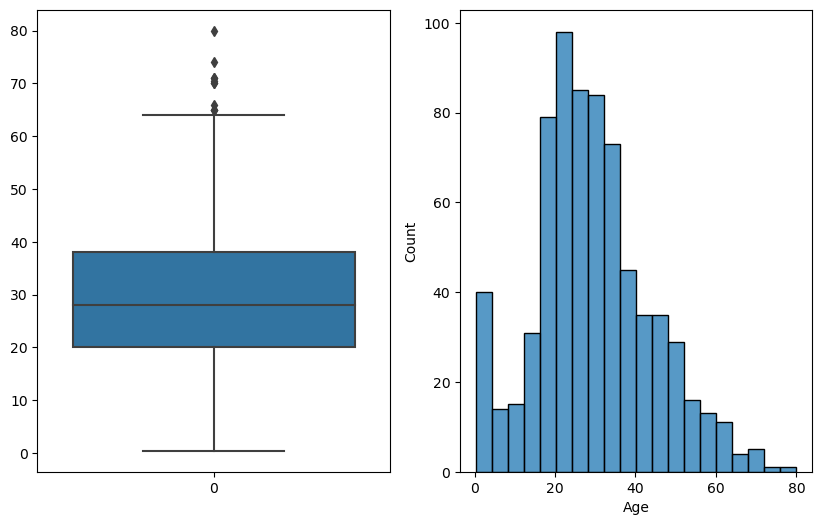

In [82]:
plt.figure(figsize = (10, 6)) # çerceve oluşturduk

plt.subplot(1, 2, 1) # 1 satır 2 sütunluk yerin 1. kısmına alttakini çizdi
sns.boxplot(data = df.Age, whis = 1.5); # whis default 1.5 iqr dir

plt.subplot(1, 2, 2) # 1 satır 2 sütunluk yerin 2. kısmına alttakini çizdi
sns.histplot(data = df.Age);

In [142]:
q1 = df.Age.quantile(0.25)
q1

20.125

In [154]:
Q1 = np.percentile(df[df['Age'].notnull()]["Age"], 25) # bu yöntemi kullanmak için Nan veya eksik değer olmamalı
Q1

20.125

In [152]:
df[df['Age'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
q3 = df.Age.quantile(0.75)
q3

38.0

In [76]:
df.Age.median()

28.0

In [77]:
iqr = q3 - q1
iqr

17.875

In [78]:
high_lim = q3 + iqr * 1.5
high_lim

64.8125

In [80]:
low_lim = q1 - iqr * 1.5
low_lim

-6.6875

In [112]:
df[df.Age > high_lim]["Age"].count()

11

In [116]:
df[df.Age < low_lim]["Age"].count()

0

In [104]:
from collections import Counter

In [105]:
Counter([1, 2, 3, 4, 5, 1, 2, 1, 1])

Counter({1: 4, 2: 2, 3: 1, 4: 1, 5: 1})

collections modülü, Python'da yerleşik bir veri tipleri koleksiyonu sağlar ve Counter sınıfı, 
belirli bir sıralamada nesnelerin sayımını tutmak için kullanılır. 
Bu sınıf, bir listede veya bir dize içindeki her öğenin sayısını hızlı ve kolay bir şekilde saymak için kullanılabilir.

Örneğin, bir listeniz varsa ve listenizdeki öğelerin sayısını saymak istiyorsanız, Counter sınıfını kullanabilirsiniz.
Bu sınıf, bir sözlük gibi davranır ve anahtarlar öğelerdir, değerler ise öğelerin sayısıdır.

Bu örnekteki from collections import Counter kodu, Counter sınıfını kullanmak için gerekli modülü içe aktarır.
Bu sayede, daha sonra kullanılabilecek Counter sınıfına erişim sağlanır.

In [157]:
# BU KODA HAYRAN OLDUM :D 
# bu bloğu kullanmak için Nan vey eksik değer olmamalı

def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        #extend kullandık çünkü liste halinde gelicek
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

# bütün sütunları değerlendirip bir satırda 2 den fazla outlier varsa onları döndürdü